# Série 8 - Exercices - Solution

Le but de  cette série est de s'exercer à l'utilisation des techniques de calcul d'intervalle de confiance sur la moyenne et de les appliquer sur un cas pratique. Il s'agit d'analyser des données collectées au Groënland et en Antarctique pour essayer de déterminer si l'atmosphère se mélange de manière homogène à l'échelle globale de la terre ou pas.

L'idée est que la neige et la glace contiennent des poussières ayant une taille de quelques microns. Ces poussières proviennent de différents processus (volcanismes, tempêtes de poussières, micro-météorites, pollution, etc.). Comme elles sont très petites et légères elle ne retombe pas naturellement.  Elle servent toutefois de nucléus pour la formation de la neige. 

Elles retournent donc au sol avec la neige et peuvent être incorporées dans de la glace dans les régions polaires. Si les courants atmosphériques mélangent de manière homogène l'atmosphère, on devrait trouver approximativement les mêmes quantités de poussières dans les échantillons en Antarctiques et Groënland. 

Pour étudier cette hypothèse, vous allez donc comparer les jeux de données collectés en Antarctique et au Groënland, et en particulier vous allez tenter de déterminer si les moyennes des concentrations en microparticules dans les neiges de ces deux régions sont semblables ou pas. 


# Chargement des données

Le fichier `microparticles.txt` contient les données. La première colonne contient un code qui décrit le lieu de collecte de l'échantillon, 0 signifie "Antarctique", 1 signifie "Groënland". La deuxième colonne contient la teneur en microparticules en ppb pour chaque mesure.

**Question 1** - Chargez les données. Calculer les moyennes pour les teneurs. Sont-elles identiques ? Qu'en pensez-vous, commentez ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('data/microparticles.txt')
lieu = data[:,0]
teneur = data[:,1]

teneur_antarctique = teneur[ lieu==0 ]
teneur_groenland = teneur[ lieu==1 ]

print("Teneur moyenne en Antarctique:", np.mean(teneur_antarctique),'ppb' )
print("Teneur moyenne au Groenland:", np.mean(teneur_groenland),'ppb')

Teneur moyenne en Antarctique: 2.66875 ppb
Teneur moyenne au Groenland: 2.466666666666667 ppb


*Commentaire:* La différence de moyenne est d'environ 0.2 ppb. En se basant juste sur ces valeurs, il est impossible de conclure. Il nous faut déterminer si cet écart est significatif ou pas.

# Visualisation des données

**Question 2** Pour mieux comprendre les données, faites un histogramme et un graphe de type boite à moustache pour les mesures en Antarctique et au Groënland et commentez vos observations.

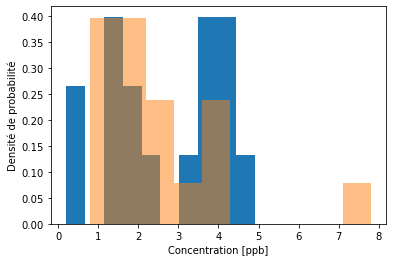

In [3]:
plt.hist(teneur_antarctique, density=True)
plt.hist(teneur_groenland, density=True, alpha = 0.5)
plt.xlabel('Concentration [ppb]')
plt.ylabel('Densité de probabilité')
plt.show()

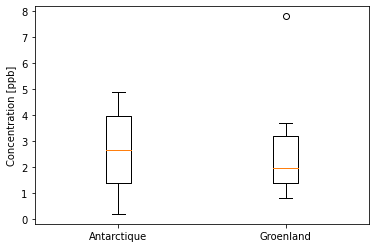

In [4]:
plt.boxplot([teneur_antarctique, teneur_groenland], labels=['Antarctique','Groenland'])
plt.ylabel('Concentration [ppb]')
plt.show()

*Commentaire:* Les deux histogrammes sont très bruités car le nombre de donnée est faible. Ils se superposent en partie. D'autre part, les deux boites à Moustache montrent que les deux distributions sont légèrement différentes, mais il est difficile de conclure quoi que ce soit. En Antarctique, la distribution est un peu plus étalée avec un interquartile plus grand. La médiane est aussi un peu plus grande. Mais au Groënland, on a aussi une valeurs extrème très élevée même si la variabilité moyenne est plus faible qu'en Antarctique. En se basant juste sur ces données, on ne peut pas conclure à une différence nette. 

# Erreur standard sur la moyenne

Pour y voir plus clair, nous devons estimer des intervalles de confiance sur la moyenne. 

**Question 3** - Calculer l'erreur standard sur la moyenne pour les deux jeux de données. Quels sont les intervalles de confiance ? 

In [5]:
n_antarctique = len(teneur_antarctique)
moyenne_antarctique = np.mean( teneur_antarctique )
erreur_standard_antarctique = np.std(teneur_antarctique, ddof=1) / np.sqrt(n_antarctique)

minimum_moyenne_antarctique = moyenne_antarctique - 2 * erreur_standard_antarctique 
maximum_moyenne_antarctique = moyenne_antarctique + 2 * erreur_standard_antarctique 

print("L'intervalle de confiance pour la moyenne en Antarctique est de :")
print( "[",minimum_moyenne_antarctique ,  maximum_moyenne_antarctique,"] ppb")

L'intervalle de confiance pour la moyenne en Antarctique est de :
[ 1.9227118530754166 3.4147881469245838 ] ppb


In [6]:
n_groenland = len(teneur_groenland)
moyenne_groenland = np.mean( teneur_groenland )
erreur_standard_groenland = np.std(teneur_groenland, ddof=1) / np.sqrt(n_antarctique)

minimum_moyenne_groenland = moyenne_groenland - 2 * erreur_standard_groenland 
maximum_moyenne_groenland = moyenne_groenland + 2 * erreur_standard_groenland

print("L'intervalle de confiance pour la moyenne en Groenland est de :")
print( "[",minimum_moyenne_groenland,  maximum_moyenne_groenland,"] ppb")

L'intervalle de confiance pour la moyenne en Groenland est de :
[ 1.653177449846706 3.2801558834866276 ] ppb



**Question 4** -Faire un graphe avec les moyennes et barres d'erreur pour montrer visuellement les intervales de confiance des deux jeux de données. Commentez le résultat. Quelle conclusion en tirez-vous ?

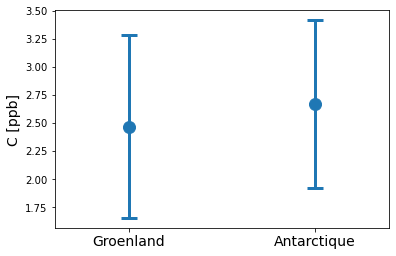

In [7]:
x = [0,1]   
plt.errorbar(x, [moyenne_groenland, moyenne_antarctique], 
             yerr=[2*erreur_standard_groenland, 2*erreur_standard_antarctique],
             fmt='o', markersize=12,
             capsize=8, capthick=3, linewidth=3)
plt.xticks([0,1], ["Groenland","Antarctique"], size=14)
plt.xlim(-0.4,1.4)
plt.ylabel('C [ppb]', size=14)
plt.show()

*Commentaire* : Les deux intervalles de confiance se superposent. Cela est  bien visible sur le graphe. Donc les deux moyennes ne sont pas significativement différentes. L'intervalle de confiance est trop large pour pouvoir conclure à une différence significative. Il est possible que l'atmosphère soit bien mélangé. Pour aller plus loin, il faudrait collecter plus de données et essayer d'améliorer la précision des moyennes. 

# Bootstrap

**Question 5** - La conclusion ci-dessus est claire. Mais on vous demande  de vérifier si la même conclusion est obtenue en utilisant le bootstrap pour faire un calcul alternatif d'intervalle de confiance. Faites le calcul et comparez ? Commentaires ?



In [8]:
def bootstrap( d, nb = 5000):
    m = np.zeros(nb)
    n = len(d)
    for i in range(nb):
        echantillon_bootstrap = np.random.choice(d, n, replace=True)
        m[i] = np.mean(echantillon_bootstrap)
    print(" [",np.percentile(m,2.5), np.percentile(m,97.5),"]")
    return np.percentile(m,2.5), np.mean(m), np.percentile(m,97.5)

print("Intervalle bootstrap pour le Groenland:")
min_moy_groenland_boot, moy_groenland_boot, max_moy_groenland_boot =  bootstrap(teneur_groenland)
print("Intervalle bootstrap pour l'Antarctique:")
min_moy_antarctique_boot, moy_antarctique_boot, max_moy_antarctique_boot = bootstrap(teneur_antarctique)

Intervalle bootstrap pour le Groenland:
 [ 1.8277777777777777 3.2666666666666666 ]
Intervalle bootstrap pour l'Antarctique:
 [ 1.9625 3.36875 ]


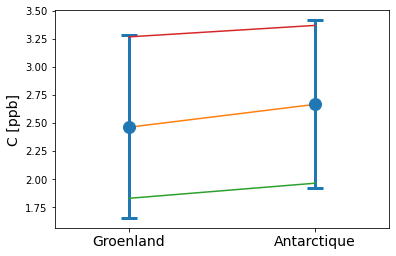

In [9]:
plt.errorbar(x, [moyenne_groenland, moyenne_antarctique], 
             yerr=[2*erreur_standard_groenland, 2*erreur_standard_antarctique],
             fmt='o', markersize=12, capsize=8, capthick=3, linewidth=3)

plt.plot(x,[moy_groenland_boot, moy_antarctique_boot])
plt.plot(x,[min_moy_groenland_boot, min_moy_antarctique_boot])
plt.plot(x,[max_moy_groenland_boot, max_moy_antarctique_boot])

plt.xticks([0,1], ["Groenland","Antarctique"], size=14)
plt.xlim(-0.4,1.4)
plt.ylabel('C [ppb]', size=14)
plt.show()

*Commentaires* : Les intervalles de confiance avec le bootstrap sont ici un peu plus resserrés que les intervalles calculés avec l'erreur standard sur la moyenne. On a toutefois les deux intervalles de confiance qui se chevauchent largement à nouveau et donc la conclusion n'est pas changée. Ce jeu de données ne montrent pas une différence significative des teneurs en poussières dans les neiges et glaces en Antarctique et au Groënland.